# Blending and Pasting Images
- Blending images is done through the __addWeighted__ function 
- This function use the following formula: 

new_pixel = $\alpha$ * pixel_1 + $\beta$ * pixel_2 + $\gamma$

STEPS:

1. Load Data
2. Resize Images
3. Blend Images

## Import libraries

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

- Load our data and change the color model from BGR (OpenCV default color model) to RGB

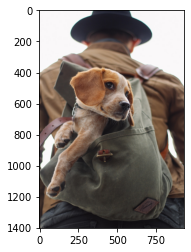

In [6]:
img1 = cv2.imread('../../data/img/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1);

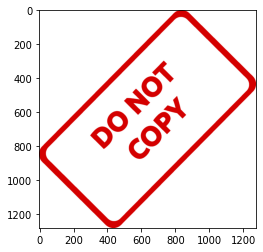

In [7]:
img2 = cv2.imread('../../data/img/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2);

__Notice that this images have not the same sizes__

## Resize Images

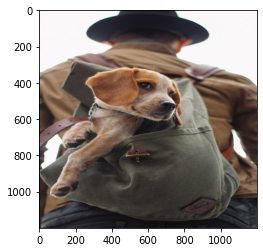

In [8]:
img1 = cv2.resize(img1, (1200,1200))
plt.imshow(img1);

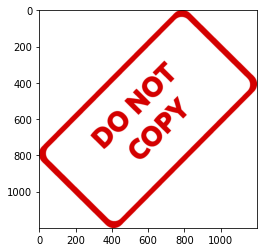

In [9]:
img2 = cv2.resize(img2, (1200,1200))
plt.imshow(img2);

## Blending Images with Same Sizes
- addWeighted just works with images which have the same sizes

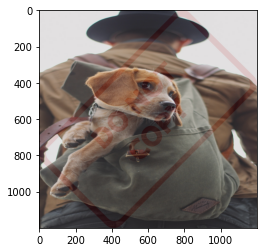

In [17]:
blended = cv2.addWeighted(src1=img1, alpha=0.8, src2=img2, beta=0.1, gamma=0)
plt.imshow(blended);

## Overlay Small Image on Top of a Larger Image (No Blending)

In [18]:
img1 = cv2.imread('../../data/img/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../../data/img/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [19]:
img2 = cv2.resize(img2, (600,600))

In [20]:
large_img = img1
small_img = img2

In [22]:
x_offset = 0
y_offset = 0

In [23]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [24]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

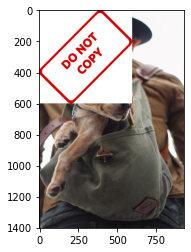

In [25]:
plt.imshow(large_img);

## Blending Images of Different Sizes

1. ROI
2. Mask

In [26]:
img1 = cv2.imread('../../data/img/dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../../data/img/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [27]:
img2 = cv2.resize(img2, (600,600))

In [28]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]

In [30]:
rows, cols, channels = img2.shape

__Creating our REGION OF INTEREST ROI__

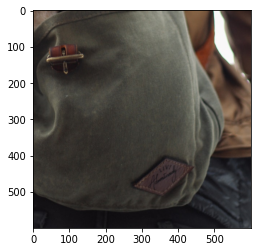

In [32]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi);

__Creating a Mask: portion of the small image which we want to paste in the large image__

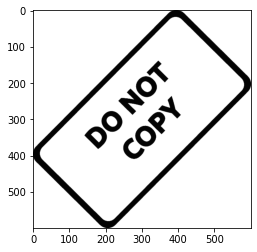

In [35]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray');

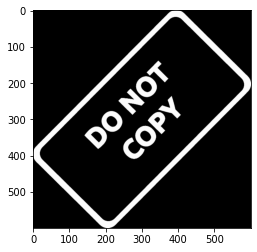

In [37]:
# we want to get the inverse of the image above
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray');

In [41]:
mask_inv.shape

(600, 600)

In [39]:
white_background = np.full(img2.shape,255, dtype=np.uint8)

In [42]:
white_background.shape

(600, 600, 3)

In [44]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [45]:
bk.shape

(600, 600, 3)

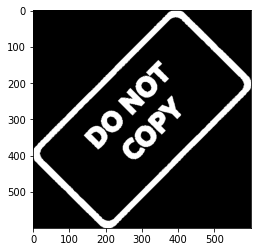

In [46]:
plt.imshow(bk, cmap='gray');

In [47]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

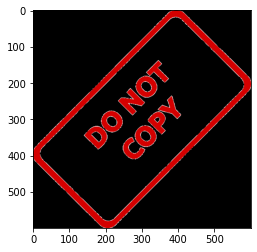

In [48]:
plt.imshow(fg, cmap='gray');

In [49]:
final_roi = cv2.bitwise_or(roi,fg)

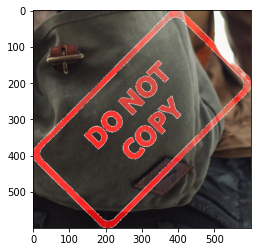

In [50]:
plt.imshow(final_roi, cmap='gray');

In [55]:
large_img = img1
small_img = final_roi

In [56]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

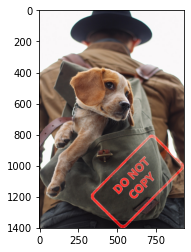

In [58]:
plt.imshow(large_img);

Check out these documentation examples and links for more help for these kinds of tasks (which can be really tricky!)

1. https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
2. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
3. https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html